# 安装说明

包已上传至PYPI官网，详见[CreditScoreModel包](https://pypi.org/project/CreditScoreModel/)

首次使用可以直接使用以下代码安装
```
pip install CreditScoreModel
```

# 模型训练

In [1]:
from CreditScoreModel.LogisticScoreCard import *
data=pd.read_csv('C:\\Users\\HP\\Desktop\\give me some credit\\data\\cs-training.csv')
data_predict=pd.read_csv('C:\\Users\\HP\\Desktop\\give me some credit\\data\\cs-test.csv')

del data['Unnamed: 0']
data.columns=['y','RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
del data_predict['Unnamed: 0']

ls=logistic_score_card()
data_train, data_test = ls.get_data_train_test(data,test_size=0.25,random_state=1234)
ls.fit(data_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
2019 16:15:06 INFO 任务开始。。。
2019 16:15:06 INFO 连续和离散变量划分中。。。
2019 16:15:06 INFO 连续和离散变量划分完成！
2019 16:15:06 INFO 连续变量最优分组进行中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.53it/s]
2019 16:15:06 INFO 连续变量最优分组完成！
2019 16:15:06 INFO 根据cut离散化连续变量进行中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.38it/s]
2019 16:15:11 INFO 根据cut离散化连续变量完成！
2019 16:15:11 INFO IV值计算中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.45it/s]
2019 16:15:11 INFO IV值计算完成！
2019 16:15:11 INFO WOE转换中。。。
100%|███████████

# 模型结果

## 评分卡

对应的变量中文名

['变量名', '变量类型', '切分点', '切分分组', 'y为1的数量', 'y为0的数量', '总数', 'y为1的数量占比', 'y为0的数量占比', '总数占比','y为1占总数比例', 'woe', '各分组iv', '变量iv值', 'logistic参数col_coef', 'logistic参数lr_intercept', '分组分数']
       

In [2]:
ls.score_card

,col,type,cuts,cut_points,1_num,0_num,total_num,1_pct,0_pct,total_pct,1_rate,woe,iv,total_iv,col_coef,lr_intercept,score
0,NumberOfTime30-59DaysPastDueNotWorse,continuous,"[-inf, 0.0, 1.0, inf]","(-inf, 0.0]",3803,90648,94451,0.503509,0.863750,0.839564,0.040264,-0.539683,0.194416,0.737079,0.538172,-2.598254,20.950981
1,NumberOfTime30-59DaysPastDueNotWorse,continuous,"[-inf, 0.0, 1.0, inf]","(0.0, 1.0]",1801,10249,12050,0.238448,0.097659,0.107111,0.149461,0.892673,0.125679,0.737079,0.538172,-2.598254,-34.654352
2,NumberOfTime30-59DaysPastDueNotWorse,continuous,"[-inf, 0.0, 1.0, inf]","(1.0, inf]",1949,4050,5999,0.258043,0.038591,0.053324,0.324887,1.900110,0.416983,0.737079,0.538172,-2.598254,-73.763987
3,NumberOfTime60-89DaysPastDueNotWorse,continuous,"[-inf, 0.0, inf]","(-inf, 0.0]",5469,101314,106783,0.724083,0.965383,0.949182,0.051216,-0.287618,0.069402,0.570277,0.403517,-2.598254,8.371879
4,NumberOfTime60-89DaysPastDueNotWorse,continuous,"[-inf, 0.0, inf]","(0.0, inf]",2084,3633,5717,0.275917,0.034617,0.050818,0.364527,2.075741,0.500875,0.570277,0.403517,-2.598254,-60.419867
5,NumberOfTimes90DaysLate,continuous,"[-inf, 0.0, inf]","(-inf, 0.0]",4953,101333,106286,0.655766,0.965564,0.944764,0.046601,-0.386908,0.119863,0.833081,0.528354,-2.598254,14.746114
6,NumberOfTimes90DaysLate,continuous,"[-inf, 0.0, inf]","(0.0, inf]",2600,3614,6214,0.344234,0.034436,0.055236,0.418410,2.302207,0.713218,0.833081,0.528354,-2.598254,-87.743345
7,RevolvingUtilizationOfUnsecuredLines,continuous,"[-inf, 0.22, 0.49, 0.86, inf]","(-inf, 0.22]",1320,62341,63661,0.174765,0.594024,0.565876,0.020735,-1.223477,0.512953,1.071693,0.643205,-2.598254,56.766152
8,RevolvingUtilizationOfUnsecuredLines,continuous,"[-inf, 0.22, 0.49, 0.86, inf]","(0.22, 0.49]",916,16760,17676,0.121276,0.159700,0.157120,0.051822,-0.275223,0.010575,1.071693,0.643205,-2.598254,12.769650
9,RevolvingUtilizationOfUnsecuredLines,continuous,"[-inf, 0.22, 0.49, 0.86, inf]","(0.49, 0.86]",1695,13027,14722,0.224414,0.124129,0.130862,0.115134,0.592169,0.059386,1.071693,0.643205,-2.598254,-27.475114


## 各变量类型以及IV值

In [3]:
ls.col_type_iv

,col,type,iv
0,RevolvingUtilizationOfUnsecuredLines,continuous,1.071693
1,age,continuous,0.239843
2,NumberOfTime30-59DaysPastDueNotWorse,continuous,0.737079
3,DebtRatio,continuous,0.069471
4,MonthlyIncome,continuous,0.076410
5,NumberOfOpenCreditLinesAndLoans,continuous,0.073217
6,NumberOfTimes90DaysLate,continuous,0.833081
7,NumberRealEstateLoansOrLines,continuous,0.055378
8,NumberOfTime60-89DaysPastDueNotWorse,continuous,0.570277
9,NumberOfDependents,continuous,0.031616


## 连续变量的切分点

In [4]:
ls.col_continuous_cut_points

[['RevolvingUtilizationOfUnsecuredLines', [-inf, 0.22, 0.49, 0.86, inf]],
 ['age', [-inf, 35.0, 55.0, 62.0, inf]],
 ['NumberOfTime30-59DaysPastDueNotWorse', [-inf, 0.0, 1.0, inf]],
 ['DebtRatio', [-inf, 0.41, 0.67, 2.66, inf]],
 ['MonthlyIncome', [-inf, 1297.0, 4838.0, 6596.0, inf]],
 ['NumberOfOpenCreditLinesAndLoans', [-inf, 2.0, 3.0, 13.0, inf]],
 ['NumberOfTimes90DaysLate', [-inf, 0.0, inf]],
 ['NumberRealEstateLoansOrLines', [-inf, 0.0, 1.0, 2.0, inf]],
 ['NumberOfTime60-89DaysPastDueNotWorse', [-inf, 0.0, inf]],
 ['NumberOfDependents', [-inf, 0.0, 1.0, 2.0, inf]]]

# 模型效果检验

2019 16:15:18 INFO 预测用户分数中。。。
2019 16:15:18 INFO 根据cut离散化连续变量进行中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.37it/s]
2019 16:15:20 INFO 根据cut离散化连续变量完成！


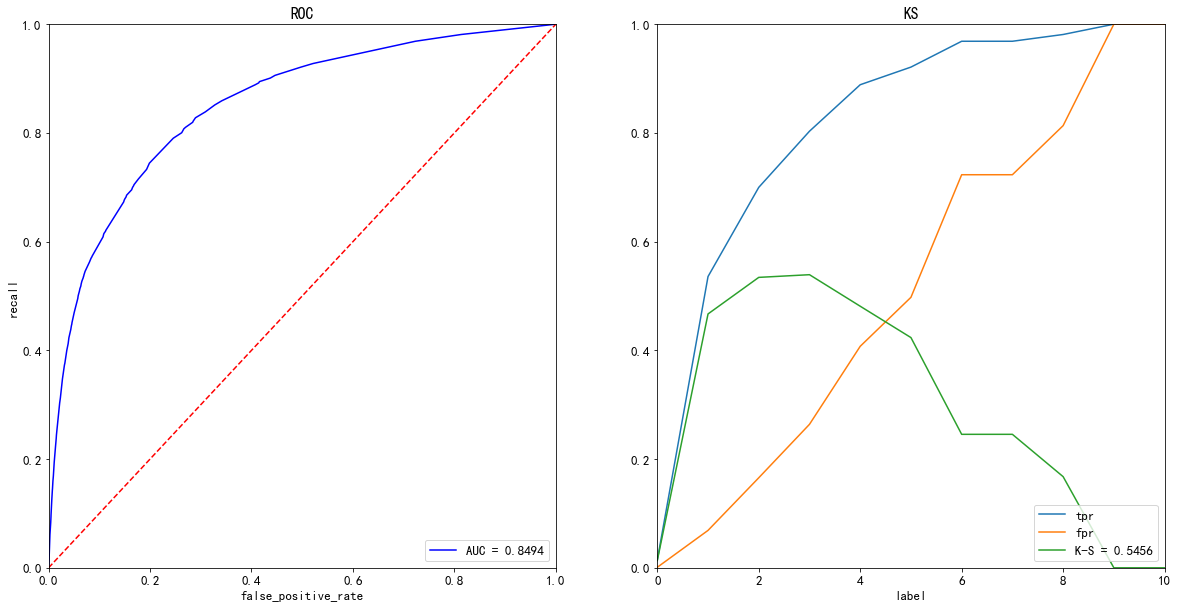

In [5]:
ls.plot_roc_ks(data_train,ls.score_card)

2019 16:15:21 INFO 预测用户分数中。。。
2019 16:15:21 INFO 根据cut离散化连续变量进行中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.97it/s]
2019 16:15:22 INFO 根据cut离散化连续变量完成！


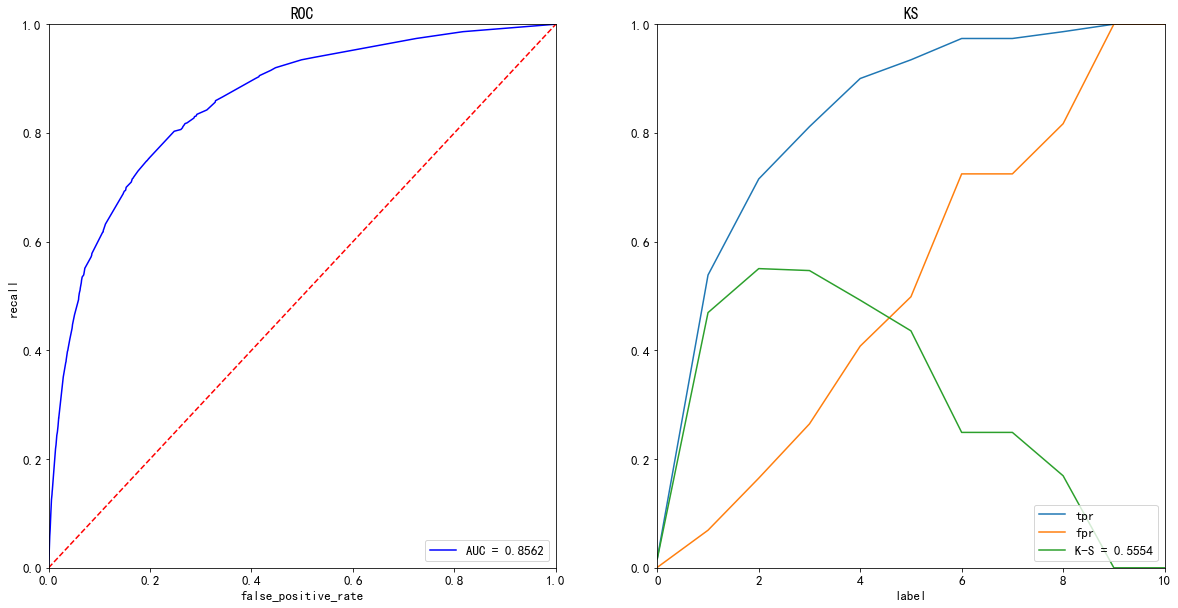

In [6]:
ls.plot_roc_ks(data_test,ls.score_card)

# 预测

In [7]:
ls.predict_score_proba(data_test,ls.score_card)

2019 16:15:22 INFO 预测用户分数中。。。
2019 16:15:22 INFO 根据cut离散化连续变量进行中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.99it/s]
2019 16:15:23 INFO 根据cut离散化连续变量完成！


,NumberOfTime30-59DaysPastDueNotWorsescore,NumberOfTime60-89DaysPastDueNotWorsescore,NumberOfTimes90DaysLatescore,RevolvingUtilizationOfUnsecuredLinesscore,agescore,score,proba
0,20.950981,8.371879,14.746114,56.766152,30.879240,731.714366,0.011842
1,20.950981,8.371879,14.746114,-63.453483,-18.706199,561.909292,0.112027
2,20.950981,8.371879,14.746114,56.766152,-6.951426,693.883700,0.019845
3,-34.654352,-60.419867,-87.743345,-27.475114,-6.951426,382.755896,0.601900
4,-73.763987,8.371879,14.746114,-63.453483,10.421482,496.322007,0.238491
5,20.950981,8.371879,14.746114,56.766152,30.879240,731.714366,0.011842
6,20.950981,8.371879,-87.743345,-63.453483,-6.951426,471.174606,0.307389
7,20.950981,8.371879,14.746114,12.769650,-6.951426,649.887198,0.035921
8,20.950981,8.371879,14.746114,56.766152,10.421482,711.256608,0.015664
9,20.950981,8.371879,14.746114,-27.475114,-6.951426,609.642434,0.061116


# 补充-模型调试

## 变量IV值以及分箱分析

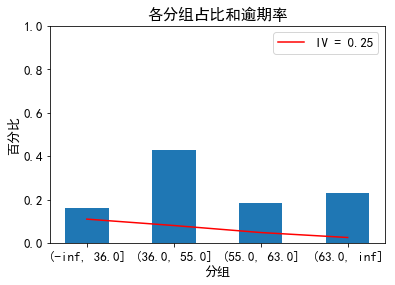

,cut_points,cut_points_id,1_num,0_num,total_num,1_pct,0_pct,total_pct,1_rate,woe,iv,total_iv
1,"(-inf, 36.0]",0,2628,21237,23865,0.262118,0.151721,0.159100,0.110119,0.546753,0.060360,0.250005
0,"(36.0, 55.0]",1,5177,58953,64130,0.516357,0.421171,0.427533,0.080727,0.203760,0.019395,0.250005
3,"(55.0, 63.0]",2,1345,26409,27754,0.134151,0.188671,0.185027,0.048461,-0.341036,0.018593,0.250005
2,"(63.0, inf]",3,876,33375,34251,0.087373,0.238437,0.228340,0.025576,-1.003921,0.151657,0.250005


In [8]:
#默认决策树分箱
ls.plot_col_woe_iv(data,'age') 

C:\ProgramData\Anaconda3\lib\site-packages\CreditScoreModel\LogisticScoreCard.py:152: RuntimeWarning: divide by zero encountered in log
  result['woe'] = np.log(result['1_pct'] / result['0_pct'])  # WOE


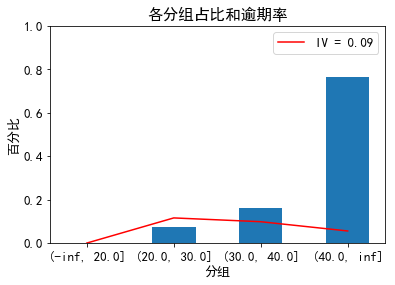

,cut_points,cut_points_id,1_num,0_num,total_num,1_pct,0_pct,total_pct,1_rate,woe,iv,total_iv
3,"(-inf, 20.0]",0,0,1,1,0.000000,0.000007,0.000007,0.000000,0.000000,0.000000,0.0
2,"(20.0, 30.0]",1,1244,9513,10757,0.124077,0.067963,0.071713,0.115646,0.601948,0.033778,0.0
1,"(30.0, 40.0]",2,2390,21949,24339,0.238380,0.156808,0.162260,0.098196,0.418847,0.034166,0.0
0,"(40.0, inf]",3,6392,108511,114903,0.637542,0.775223,0.766020,0.055630,-0.195529,0.026921,0.0


In [9]:
# 手动分箱
ls.plot_col_woe_iv(data,'age',[-inf,20,30,40,inf])

C:\ProgramData\Anaconda3\lib\site-packages\CreditScoreModel\LogisticScoreCard.py:152: RuntimeWarning: divide by zero encountered in log
  result['woe'] = np.log(result['1_pct'] / result['0_pct'])  # WOE


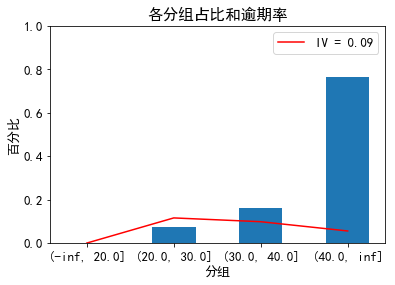

In [10]:
# 不输出具体数据
ls.plot_col_woe_iv(data,'age',[-inf,20,30,40,inf],return_data=False)

## 模型效果分析

2019 16:15:35 INFO 评分卡制作中。。。
2019 16:15:35 INFO 连续和离散变量划分中。。。
2019 16:15:35 INFO 连续和离散变量划分完成！
2019 16:15:35 INFO 根据cut离散化连续变量进行中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.50it/s]
2019 16:15:38 INFO 根据cut离散化连续变量完成！
2019 16:15:38 INFO WOE转换中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.89it/s]
2019 16:15:38 INFO WOE转换完成！
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
2019 16:15:40 INFO 评分卡制作完成！
2019 16:15:40 INFO 预测用户分数中。。。
2019 16:15:40 INFO 根据cut离散化连续变量进行中。。。
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.41it/s]
2019 16:15:43 INFO 根据cut离散化连续变量完成！


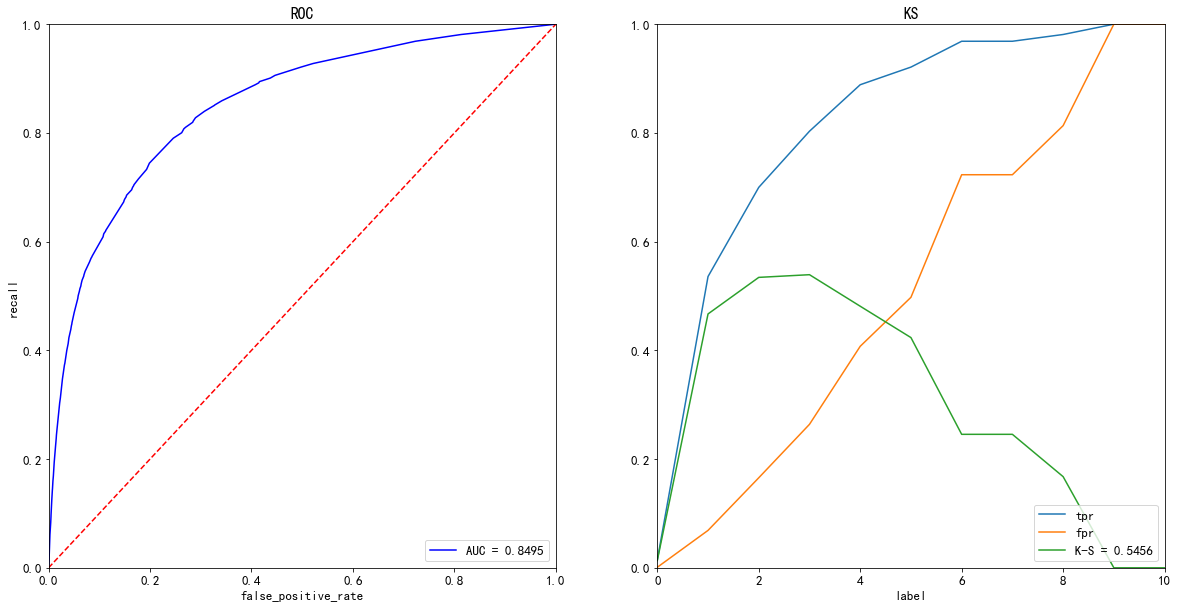

In [12]:
#默认参数跑出的结果
col_result=ls.col_result
col_continuous_cut_points=[col for col in ls.col_continuous_cut_points if col[0] in ls.col_result]
data_new=data_train[ls.col_result+['y']]

score_card=ls.get_logistic_socre_card(data_new,col_continuous_cut_points)
ls.plot_roc_ks(data_new,score_card)

2019 16:15:43 INFO 评分卡制作中。。。
2019 16:15:43 INFO 连续和离散变量划分中。。。
2019 16:15:43 INFO 连续和离散变量划分完成！
2019 16:15:43 INFO 根据cut离散化连续变量进行中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.49it/s]
2019 16:15:48 INFO 根据cut离散化连续变量完成！
2019 16:15:48 INFO WOE转换中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.17it/s]
2019 16:15:49 INFO WOE转换完成！
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
2019 16:15:54 INFO 评分卡制作完成！
2019 16:15:54 INFO 预测用户分数中。。。
2019 16:15:54 INFO 根据cut离散化连续变量进行中。。。
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.13it/s]
2019 16:15:58 INFO 根据cut离散化连续变量完成！


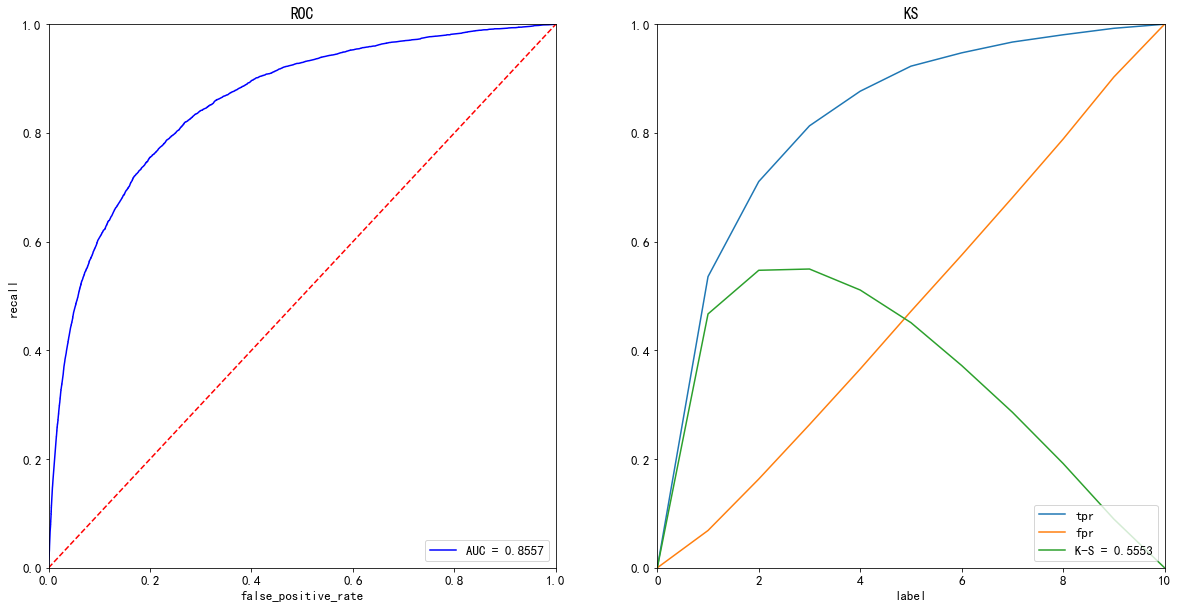

In [13]:
# 例如：选取全部变量，并按以下切分点分箱
col_result=['y', 'RevolvingUtilizationOfUnsecuredLines', 'age',
           'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
           'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfDependents']
col_continuous_cut_points=[['RevolvingUtilizationOfUnsecuredLines', [-inf, 0.22, 0.49, 0.86, inf]],
                         ['age', [-inf, 35.0, 55.0, 62.0, inf]],
                         ['NumberOfTime30-59DaysPastDueNotWorse', [-inf, 0.0, 1.0, inf]],
                         ['DebtRatio', [-inf, 0.41, 0.67, 2.66, inf]],
                         ['MonthlyIncome', [-inf, 1297.0, 4838.0, 6596.0, inf]],
                         ['NumberOfOpenCreditLinesAndLoans', [-inf, 2.0, 3.0, 13.0, inf]],
                         ['NumberOfTimes90DaysLate', [-inf, 0.0, inf]],
                         ['NumberRealEstateLoansOrLines', [-inf, 0.0, 1.0, 2.0, inf]],
                         ['NumberOfTime60-89DaysPastDueNotWorse', [-inf, 0.0, inf]],
                         ['NumberOfDependents', [-inf, 0.0, 1.0, 2.0, inf]]]
data_new=data_train[col_result]

score_card=ls.get_logistic_socre_card(data_new,col_continuous_cut_points)
ls.plot_roc_ks(data_new,score_card)

# 补充-包的参数解释

```
def __init__(self,
         max_depth=None,  # 决策树的深度
         max_leaf_nodes=4,  # 决策树的子节点数
         min_samples_leaf=0.05,  # 分节点最小划分比例
         base_score=600,  # 基础分
         increase_score=50,  # 增加分（概率增加一份所增加的分数）
         min_iv=0.1,  # 特征筛选（选取IV值大于0.1的值）
         max_corr=0.6,  # 特征筛选（选取相关性小于0.6的值）
         C=0.01,  # 特征筛选（L1正则化系数）
         penalty='l1',  # 特征筛选（L1正则化）
         round_num=2  # 所有变量保留两位有效数
         ):

    # 参数选择
    self.max_depth = max_depth
    self.max_leaf_nodes = max_leaf_nodes
    self.min_samples_leaf = min_samples_leaf
    self.base_score = base_score
    self.increase_score = increase_score
    self.min_iv = min_iv
    self.max_corr = max_corr
    self.C = C
    self.penalty = penalty
    self.round_num = round_num

    # 保存变量结果
    self.col_type_iv = None  # 各变量类型以及IV值
    self.col_continuous_cut_points = None  # 连续变量的切分点
    self.col_result = None  # 最终评分卡选择的变量
    self.score_card = None  # 评分卡
```